In [1]:
# %load uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from math import floor, ceil
# Script to add the entire project directory structure to the python path
import sys, os

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
if '%s\\pyuoi' % p not in sys.path:
	sys.path.append('%s\\pyuoi' % p)

In [2]:
# %load ../plotting.py
# plotting
params = {
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
fnames = ['data/12052018/sparse1.h5', 'data/12052018/sparse08.h5', 'data/12052018/sparse06.h5', 'data/12052018/sparse04.h5', 'data/12052018/sparse02.h5']
files = [h5py.File(filename, 'r') for filename in fnames]
fn = [file['fn'][:] for file in files]
r2 = [file['r2'][:] for file in files]
r2_true = [file['r2_true'][:] for file in files]
beta = [file['beta'][:] for file in files]
beta_hats = [file['beta_hats'][:] for file in files]

In [4]:
# Average
fn_avg = [np.mean(f, 0) for f in fn]
r2_avg = [np.mean(f, 0) for f in r2]
r2_true = [np.mean(f, 0) for f in r2_true]
beta_avg = [np.mean(f, 0) for f in beta]
betah_avg = [np.mean(f, 0) for f in beta_hats]

In [13]:
beta_hats[0][0, 0, 0, :].shape

(25,)

Description: 5x5 block structure with uniform correlations within blocks. Varied the degree of sparsity, used a 0.1 inverse signal to noise ratio and BIC model selection score. 

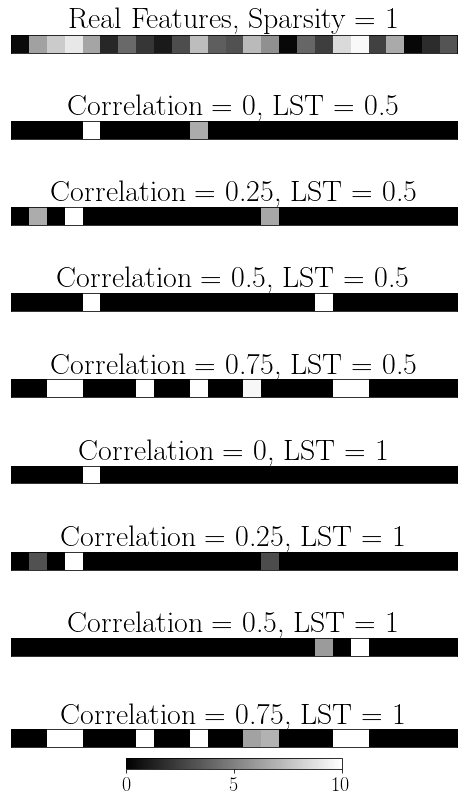

In [42]:
plt.subplots(figsize=(8, 14))
plt.subplot(911)
# plt.plot(fn_avg[0][0, :])
# plt.plot(fn_avg[0][1, :])
# plt.plot(fn_avg[0][2, :])
# plt.plot(fn_avg[0][3, :])
# plt.title('Sparsity = 1')
# plt.subplot(152)
# plt.plot(r2_avg[0][0, :])
# plt.plot(r2_avg[0][1, :])
# plt.plot(r2_avg[0][2, :])
# plt.plot(r2_avg[0][3, :])
# plt.plot(r2_true[0])


plt.imshow(beta[0][0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.xticks([])
plt.yticks([])
plt.title('Real Features, Sparsity = 1')
plt.subplot(912)
plt.title('Correlation = 0, LST = 0.5')
plt.imshow(beta_hats[0][0, 0, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.xticks([])
plt.yticks([])
plt.subplot(913)
plt.imshow(beta_hats[0][0, 1, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.25, LST = 0.5')
plt.xticks([])
plt.yticks([])

plt.subplot(914)
plt.imshow(beta_hats[0][0, 2, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.5, LST = 0.5')
plt.xticks([])
plt.yticks([])

plt.subplot(915)
plt.imshow(beta_hats[0][0, 3, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.75, LST = 0.5')
plt.xticks([])
plt.yticks([])

plt.subplot(916)
plt.imshow(beta_hats[0][0, 0, 1, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0, LST = 1')
plt.xticks([])
plt.yticks([])

plt.subplot(917)
plt.imshow(beta_hats[0][0, 1, 1, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.25, LST = 1')
plt.xticks([])
plt.yticks([])

plt.subplot(918)
plt.imshow(beta_hats[0][0, 2, 1, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.5, LST = 1')
plt.xticks([])
plt.yticks([])

plt.subplot(919)
plt.xticks([])
plt.yticks([])
plt.title('Correlation = 0.75, LST = 1')
plt.imshow(beta_hats[0][0, 3, 1, :, np.newaxis].T, vmin = 0, vmax = 10)

plt.colorbar(orientation='horizontal')
plt.savefig('sparse1betas.png')

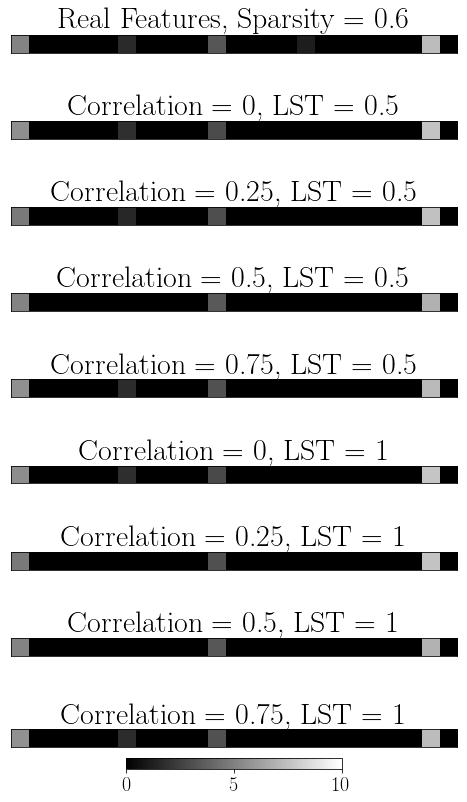

In [48]:
plt.subplots(figsize=(8, 14))
plt.subplot(911)
plt.imshow(beta[4][0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.xticks([])
plt.yticks([])
plt.title('Real Features, Sparsity = 0.6')
plt.subplot(912)
plt.title('Correlation = 0, LST = 0.5')
plt.imshow(beta_hats[4][0, 0, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.xticks([])
plt.yticks([])
plt.subplot(913)
plt.imshow(beta_hats[4][0, 1, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.25, LST = 0.5')
plt.xticks([])
plt.yticks([])

plt.subplot(914)
plt.imshow(beta_hats[4][0, 2, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.5, LST = 0.5')
plt.xticks([])
plt.yticks([])

plt.subplot(915)
plt.imshow(beta_hats[4][0, 3, 0, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.75, LST = 0.5')
plt.xticks([])
plt.yticks([])

plt.subplot(916)
plt.imshow(beta_hats[4][0, 0, 1, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0, LST = 1')
plt.xticks([])
plt.yticks([])

plt.subplot(917)
plt.imshow(beta_hats[4][0, 1, 1, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.25, LST = 1')
plt.xticks([])
plt.yticks([])

plt.subplot(918)
plt.imshow(beta_hats[4][0, 2, 1, :, np.newaxis].T, vmin = 0, vmax = 10)
plt.title('Correlation = 0.5, LST = 1')
plt.xticks([])
plt.yticks([])

plt.subplot(919)
plt.xticks([])
plt.yticks([])
plt.title('Correlation = 0.75, LST = 1')
plt.imshow(beta_hats[4][0, 3, 1, :, np.newaxis].T, vmin = 0, vmax = 10)

plt.colorbar(orientation='horizontal')
plt.savefig('sparse02betas.png')

In [40]:
print(fn_avg[4]/(0.2 * 25))
print(r2_avg[4])

[[0.2   0.208]
 [0.188 0.2  ]
 [0.208 0.196]
 [0.228 0.208]]
[[0.89176419 0.89073105]
 [0.89668873 0.89413022]
 [0.89323517 0.89578038]
 [0.89047292 0.89410172]]


Observations: The effect of the lower selection threshold is still present and depends on the correlation between covariates. Algorithm performs very poorly when there is no sparsity. R^2 is highest when correlation is largest (0.75)? This seems to conflict with Pratik's results. Furthermore, the R^2 overall, even with a higher signal to noise ratio, is lower

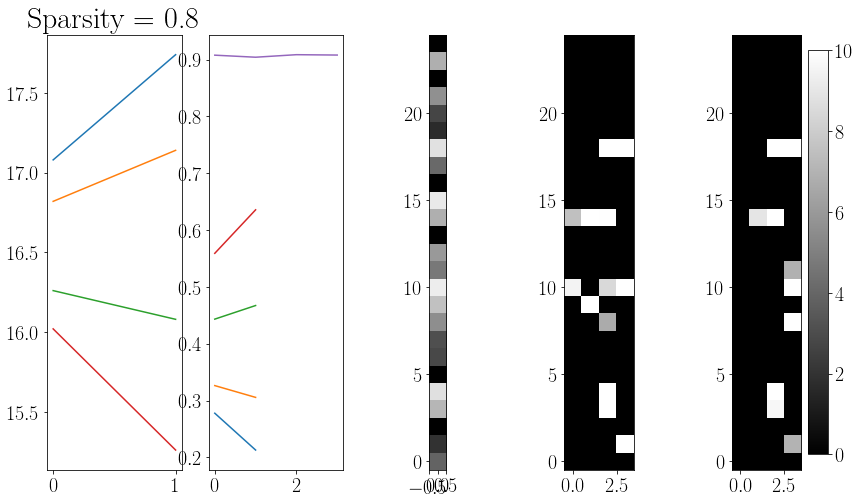

In [104]:
plt.subplots(figsize=(14, 8))
plt.subplot(151)
plt.plot(fn_avg[1][0, :])
plt.plot(fn_avg[1][1, :])
plt.plot(fn_avg[1][2, :])
plt.plot(fn_avg[1][3, :])
plt.title('Sparsity = 0.8')
plt.subplot(152)
plt.plot(r2_avg[1][0, :])
plt.plot(r2_avg[1][1, :])
plt.plot(r2_avg[1][2, :])
plt.plot(r2_avg[1][3, :])
plt.plot(r2_true[1])
plt.subplot(153)
plt.imshow(beta[1][0, :, np.newaxis], vmin = 0, vmax = 10)
plt.subplot(154)
plt.imshow(beta_hats[1][0, :, 0, :].T, vmin = 0, vmax = 10)
plt.subplot(155)
plt.imshow(beta_hats[1][0, :, 1, :].T, vmin = 0, vmax = 10)
plt.colorbar()

In [100]:
# Number of non-zero beta: 
0.8 * 25

20.0

Observations: R^2 is qualitatively similar to the non-sparse case

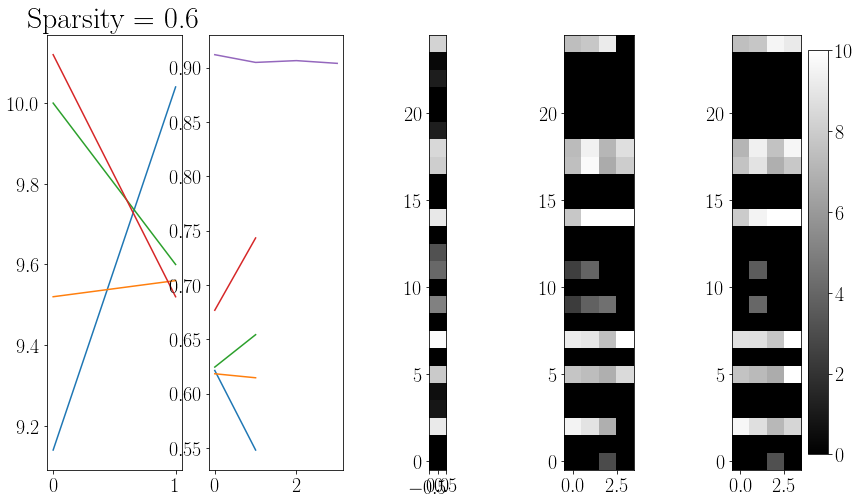

In [106]:
plt.subplots(figsize=(14, 8))
plt.subplot(151)
plt.plot(fn_avg[2][0, :])
plt.plot(fn_avg[2][1, :])
plt.plot(fn_avg[2][2, :])
plt.plot(fn_avg[2][3, :])
plt.title('Sparsity = 0.6')
plt.subplot(152)
plt.plot(r2_avg[2][0, :])
plt.plot(r2_avg[2][1, :])
plt.plot(r2_avg[2][2, :])
plt.plot(r2_avg[2][3, :])
plt.plot(r2_true[2])
plt.subplot(153)
plt.imshow(beta[2][0, :, np.newaxis], vmin = 0, vmax = 10)
plt.subplot(154)
plt.imshow(beta_hats[2][0, :, 0, :].T, vmin = 0, vmax = 10)
plt.subplot(155)
plt.imshow(beta_hats[2][0, :, 1, :].T, vmin = 0, vmax = 10)
plt.colorbar()

In [103]:
25 * 0.6

15.0

Observations: Performance increases, although more correlated covariates are still regressed the best. Feature selection is highly consistent across different levels of correlation, and generally the right features are being selected. Poor R^2 performance can be attributed to estimation

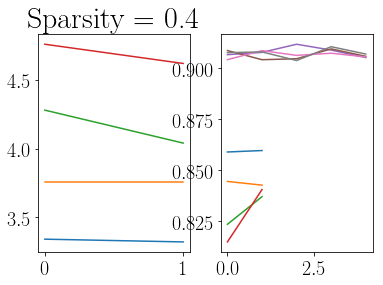

In [44]:
plt.subplots(figsize=(14, 8))
plt.subplot(151)
plt.plot(fn_avg[0][0, :])
plt.plot(fn_avg[0][1, :])
plt.plot(fn_avg[0][2, :])
plt.plot(fn_avg[0][3, :])
plt.title('Sparsity = 1')
plt.subplot(152)
plt.plot(r2_avg[0][0, :])
plt.plot(r2_avg[0][1, :])
plt.plot(r2_avg[0][2, :])
plt.plot(r2_avg[0][3, :])
plt.plot(r2_true[0])
plt.subplot(153)
plt.imshow(beta[0][0, :, np.newaxis], vmin = 0, vmax = 10)
plt.subplot(154)
plt.imshow(beta_hats[0][0, :, 0, :].T, vmin = 0, vmax = 10)
plt.subplot(155)
plt.imshow(beta_hats[0][0, :, 1, :].T, vmin = 0, vmax = 10)
plt.colorbar()

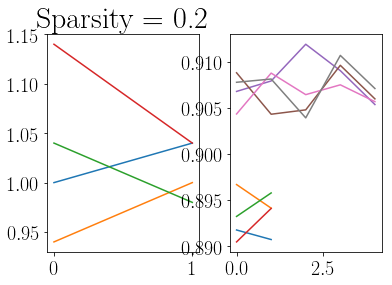

In [46]:
plt.subplot(1, 2, 1)
plt.plot(fn_avg[4][0, :])
plt.plot(fn_avg[4][1, :])
plt.plot(fn_avg[4][2, :])
plt.plot(fn_avg[4][3, :])
plt.title('Sparsity = 0.2')
plt.subplot(1, 2, 2)
plt.plot(r2_avg[4][0, :])
plt.plot(r2_avg[4][1, :])
plt.plot(r2_avg[4][2, :])
plt.plot(r2_avg[4][3, :])
plt.plot(r2_true)

In [79]:
block_size = 10
n_blocks = 5
sparsity = 0.4
n_features = block_size *  n_blocks
n_nonzero_beta = int(sparsity * block_size)

beta = np.random.uniform(low=0, high=10, size=(n_features, 1))
mask = np.array([])
for block in range(n_blocks):
    block_mask = np.zeros(block_size)
    block_mask[:n_nonzero_beta] = np.ones(n_nonzero_beta)
    np.random.shuffle(block_mask)
    mask = np.concatenate((mask, block_mask))
mask = mask[..., np.newaxis]
beta = beta * mask


In [80]:
beta

array([[6.96478895],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.64196349],
       [0.        ],
       [6.43488234],
       [7.02130809],
       [0.        ],
       [0.        ],
       [0.        ],
       [7.69866673],
       [4.76650912],
       [7.81005254],
       [0.        ],
       [0.        ],
       [4.46707792],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [7.72551898],
       [0.        ],
       [0.86683494],
       [4.24259027],
       [5.13799057],
       [0.        ],
       [0.        ],
       [6.80893995],
       [0.        ],
       [0.        ],
       [5.38859808],
       [0.        ],
       [9.72167797],
       [0.        ],
       [4.83400555],
       [0.35320376],
       [0.        ],
       [0.44698457],
       [0.        ],
       [0.        ],
       [3.93338149],
       [0.        ],
       [0.   